# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [8]:
from sklearn.model_selection import train_test_split

# Carregar o arquivo CSV
df = pd.read_csv("df_final_17.csv")

# Separar as variáveis independentes (X) e a variável dependente (y)
y = df['Credit Score']
X = df.drop(columns=['Credit Score'])

# Verificar as dimensões de X e y
print("Dimensões de X:", X.shape)
print("Dimensões de y:", y.shape)

# Verificar se as categorias em y estão balanceadas
print("Distribuição das classes em y:")
print(y.value_counts(normalize=True))

# Dividir o dataset em treino e teste (caso ainda não tenha sido feito)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirmar as dimensões após a divisão
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

# Balanceamento nas bases de treino e teste
print("Distribuição de classes em y_train:")
print(y_train.value_counts(normalize=True))

print("Distribuição de classes em y_test:")
print(y_test.value_counts(normalize=True))


Dimensões de X: (130, 7)
Dimensões de y: (130,)
Distribuição das classes em y:
Credit Score
High       0.676923
Average    0.238462
Low        0.084615
Name: proportion, dtype: float64
Dimensões de X_train: (104, 7)
Dimensões de X_test: (26, 7)
Dimensões de y_train: (104,)
Dimensões de y_test: (26,)
Distribuição de classes em y_train:
Credit Score
High       0.673077
Average    0.240385
Low        0.086538
Name: proportion, dtype: float64
Distribuição de classes em y_test:
Credit Score
High       0.692308
Average    0.230769
Low        0.076923
Name: proportion, dtype: float64


## Verificação das Dimensões das Bases

Realizei inicialmente a verificação das **dimensões das bases**. A base de variáveis independentes, **X**, possui **130 linhas e 7 colunas**, enquanto a variável dependente, **y**, apresenta **130 linhas**. Isso indica que o número de observações está consistente entre as duas bases.

## Distribuição das Classes na Variável Credit Score

Em seguida, analisei a **distribuição das classes** na variável **Credit Score** de **y**, que contém três categorias:

- **High**: 67,69%
- **Average**: 23,85%
- **Low**: 8,46%

Essa análise revelou que as classes estão desbalanceadas, com uma predominância expressiva da classe **High**.

## Divisão das Bases de Treino e Teste

Após essa etapa, avaliei a **divisão das bases de treino e teste**. A base de treino foi composta por **104 observações (80%)** e a de teste por **26 (20%)**, valores apropriados para treinamento e validação do modelo.

## Distribuição das Classes nas Bases de Treino e Teste

Por fim, examinei as distribuições das classes em cada base. As proporções de **y_train** e **y_test** estão bastante próximas das proporções originais, o que indica que a divisão foi realizada de maneira representativa:

- **Base de Treino (y_train):**
  - **High**: 67,31%
  - **Average**: 24,04%
  - **Low**: 8,65%

- **Base de Teste (y_test):**
  - **High**: 69,23%
  - **Average**: 23,08%
  - **Low**: 7,69%

## Conclusão

Concluo que as bases foram corretamente estruturadas e representam adequadamente os dados originais. Contudo, dado o desbalanceamento das classes, pode ser necessário aplicar técnicas de balanceamento, como **oversampling** ou **undersampling**, para melhorar o desempenho do modelo ao lidar com a classe minoritária.


In [9]:
# Codificar variáveis categóricas em X_train usando LabelEncoder
X_train_encoded = X_train.copy()
label_encoders = {}

# Codificando todas as variáveis categóricas em X_train
for column in X_train_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_train_encoded[column] = le.fit_transform(X_train_encoded[column])
    label_encoders[column] = le  # Salvar o encoder para possível decodificação

# Codificar y_train com LabelEncoder
y_train_encoded = LabelEncoder().fit_transform(y_train)

# Verificar a distribuição original das classes em y_train
print("Distribuição original das classes em y_train:")
print(Counter(y_train))

# Aplicar o SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train_encoded)

# Verificar a nova distribuição das classes em y_train_balanced
print("\nDistribuição após balanceamento com SMOTE:")
print(Counter(y_train_balanced))

# Converter y_train_balanced de volta para DataFrame para melhor visualização
y_train_balanced = pd.DataFrame(y_train_balanced, columns=['Credit Score'])

# Exibir proporções após o balanceamento
balanced_proportions = y_train_balanced['Credit Score'].value_counts(normalize=True).rename_axis('Credit Score').reset_index(name='proportion')
print("\nProporções das classes após balanceamento:")
print(balanced_proportions)

Distribuição original das classes em y_train:
Counter({'High': 70, 'Average': 25, 'Low': 9})

Distribuição após balanceamento com SMOTE:
Counter({1: 70, 0: 70, 2: 70})

Proporções das classes após balanceamento:
   Credit Score  proportion
0             1    0.333333
1             0    0.333333
2             2    0.333333


## Desbalanceamento e Aplicação do SMOTE

A **distribuição original** das classes em `y_train` mostrava um desbalanceamento, com a classe **High** representando a maior parte dos dados (**70 ocorrências**), seguida pelas classes **Average** (**25 ocorrências**) e **Low** (**9 ocorrências**). Esse desbalanceamento poderia afetar a performance do modelo, especialmente em relação às classes com menor frequência.

Após aplicar o **SMOTE**, a distribuição das classes foi **balanceada**, com cada classe (**High**, **Average**, **Low**) possuindo agora **70 ocorrências**. Como resultado, as proporções das classes passaram a ser iguais, com cada uma representando **33,33%** do total de dados.

Esse balanceamento é importante, pois garante que o modelo de **Naive Bayes** não favoreça excessivamente a classe **High** (a mais frequente inicialmente), proporcionando uma análise mais justa e equilibrada para todas as classes. Isso deve resultar em um modelo mais robusto e capaz de lidar melhor com as classes menos representadas.


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Acurácia do modelo: 1.0000

Recall (média ponderada): 1.0000


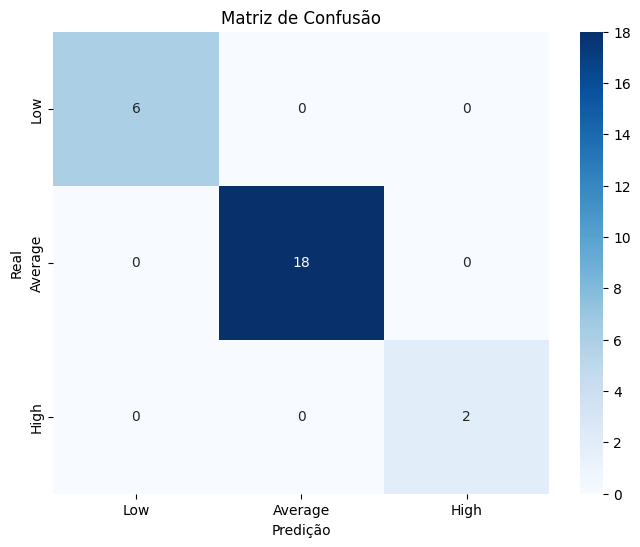

In [10]:
# Aplicando o algoritmo Naive Bayes
# Criando o modelo
model = GaussianNB()

# Treinando o modelo com os dados balanceados
model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões sobre o conjunto de teste
X_test_encoded = X_test.copy()

# Codificando as variáveis categóricas de X_test
for column in X_test_encoded.select_dtypes(include=['object', 'category']).columns:
    le = label_encoders.get(column)
    if le:
        X_test_encoded[column] = le.transform(X_test_encoded[column])

# Previsões no conjunto de teste
y_pred = model.predict(X_test_encoded)

# Decodificar y_pred de volta para as classes originais (strings)
y_pred_decoded = LabelEncoder().fit(y_train).inverse_transform(y_pred)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"\nAcurácia do modelo: {accuracy:.4f}")

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_decoded)

# Calcular o recall do modelo
recall = recall_score(y_test, y_pred_decoded, average='weighted')
print(f"\nRecall (média ponderada): {recall:.4f}")


# Criar o gráfico da matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Average', 'High'], yticklabels=['Low', 'Average', 'High'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')


Acurácia do modelo nos dados de treinamento: 0.9808
Recall (média macro) nos dados de treinamento: 0.9819

Matriz de Confusão:
[[24  0  1]
 [ 1 69  0]
 [ 0  0  9]]


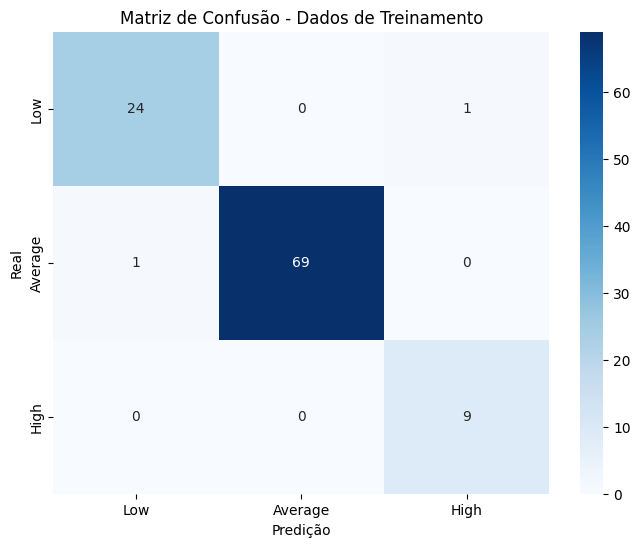

In [11]:

# Fazer previsões sobre o conjunto de treinamento
y_pred_train = model.predict(X_train_encoded)

# Decodificar y_pred_train de volta para as classes originais (strings)
y_pred_train_decoded = LabelEncoder().fit(y_train).inverse_transform(y_pred_train)

# Avaliar a acurácia do modelo
accuracy_train = accuracy_score(y_train, y_pred_train_decoded)
print(f"\nAcurácia do modelo nos dados de treinamento: {accuracy_train:.4f}")

# Calcular o recall com média macro
recall_train = recall_score(y_train, y_pred_train_decoded, average='macro')
print(f"Recall (média macro) nos dados de treinamento: {recall_train:.4f}")

# Calcular a matriz de confusão
conf_matrix_train = confusion_matrix(y_train, y_pred_train_decoded)
print("\nMatriz de Confusão:")
print(conf_matrix_train)

# Criar o gráfico da matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Average', 'High'], yticklabels=['Low', 'Average', 'High'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.show()


## Avaliação do Modelo nos Dados de Treinamento

A avaliação do modelo nos dados de treinamento mostrou bons resultados, o que indica que o modelo está performando bem no conjunto de treinamento.

### 1. Acurácia do Modelo
A **acurácia** do modelo nos dados de treinamento foi **98,08%**. Isso significa que o modelo acertou aproximadamente 98% das previsões para as classes do conjunto de dados de treinamento. Esse valor é alto, o que sugere que o modelo tem uma boa capacidade de generalização nesse conjunto.

### 2. Recall (Média Macro)
O **recall** (média macro) foi de **98,19%**. O recall calcula a capacidade do modelo de identificar corretamente as instâncias positivas para cada classe. Como estamos lidando com um problema de classificação multiclasse, usamos a média macro, que calcula o recall individualmente para cada classe e depois tira a média desses valores. Um recall tão alto indica que o modelo está fazendo um bom trabalho em identificar corretamente todas as classes.

### 3. Matriz de Confusão
A **matriz de confusão** mostra o desempenho do modelo em relação às diferentes classes:

```python
[[24  0  1]    -> 24 casos da classe "Low" foram corretamente classificados, 1 caso foi classificado erroneamente como "High".
 [ 1 69  0]    -> 69 casos da classe "Average" foram corretamente classificados, 1 caso foi erroneamente classificado como "Low".
 [ 0  0  9]]   -> 9 casos da classe "High" foram corretamente classificados.


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.


Acurácia do modelo nos dados de teste: 1.0000
Recall (média macro) nos dados de teste: 1.0000

Matriz de Confusão - Dados de Teste:
[[ 6  0  0]
 [ 0 18  0]
 [ 0  0  2]]


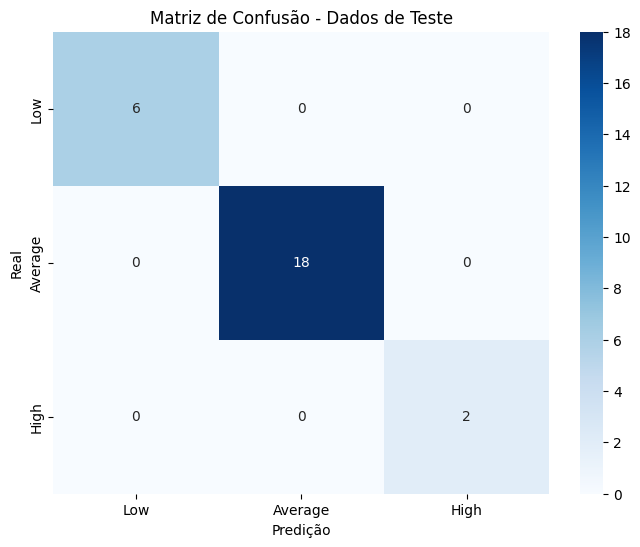

In [13]:
# Decodificar y_pred_test para o formato de string (caso necessário)
y_pred_test_decoded = LabelEncoder().fit(y_train).inverse_transform(y_pred_test)

# Avaliar a acurácia do modelo no conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test_decoded)
print(f"\nAcurácia do modelo nos dados de teste: {accuracy_test:.4f}")

# Calcular o recall com média macro
recall_test = recall_score(y_test, y_pred_test_decoded, average='macro')
print(f"Recall (média macro) nos dados de teste: {recall_test:.4f}")

# Calcular a matriz de confusão para o conjunto de teste
conf_matrix_test = confusion_matrix(y_test, y_pred_test_decoded)
print("\nMatriz de Confusão - Dados de Teste:")
print(conf_matrix_test)

# Criar o gráfico da matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Average', 'High'],
            yticklabels=['Low', 'Average', 'High'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Dados de Teste')
plt.show()


## Desempenho do Modelo

O modelo apresentou um desempenho impressionante, com métricas extremamente altas tanto na base de treinamento quanto na base de teste. Nos dados de treinamento, a **acurácia** foi de **98,08%** e o **recall médio** de **98,19%**. Isso demonstra que o modelo conseguiu aprender bem os padrões presentes no conjunto de treinamento, errando apenas 2 previsões em 104 amostras. A **matriz de confusão** nos dados de treinamento confirma esse desempenho consistente, com apenas um erro ao confundir "Low" com "High" e outro ao confundir "Average" com "Low".

Quando analisamos a base de teste, o desempenho foi ainda mais marcante, com acurácia e recall médios de **100%**. Ou seja, o modelo acertou todas as 26 previsões, sem cometer nenhum erro. A matriz de confusão reflete isso perfeitamente, mostrando que cada classe foi corretamente identificada. Essa performance impecável no conjunto de teste é um excelente indicador de que o modelo **generalizou bem** e não apresenta sinais de **overfitting**, o que é sempre uma preocupação ao trabalhar com dados balanceados artificialmente, como foi feito com o **SMOTE**.

## Implicações dos Resultados

### Dados Balanceados
O balanceamento das classes com o **SMOTE** foi essencial para que o modelo lidasse bem com as classes menos representadas. Antes do balanceamento, a classe "Low" era bastante sub-representada, e isso poderia ter feito o modelo ignorá-la em prol das classes mais frequentes. Com o balanceamento, o modelo conseguiu tratar todas as classes de maneira equitativa, o que foi fundamental para alcançar esses resultados.

### Generalização
O fato de o modelo ter mantido (e até superado) o desempenho do treino no teste é um ótimo indicativo de que ele é capaz de **generalizar bem** para novos dados. Isso é crucial em aplicações reais, já que os dados usados no treinamento nunca refletem completamente as condições do mundo real.

### Distribuição dos Dados
A alta performance também sugere que os dados de treino e teste são bem representativos do problema em questão. A proporção das classes nos dois conjuntos está alinhada, o que ajuda a evitar vieses e resultados enganosos.

### Complexidade do Problema
A aplicação do **Naive Bayes**, um modelo relativamente simples, também indica que os dados têm padrões claros e bem definidos. Em outras palavras, as classes parecem ser bem separáveis com base nas variáveis disponíveis, o que facilita o trabalho do modelo.

### Confiabilidade no Mundo Real
Apesar do excelente desempenho, é importante considerar que as condições no mundo real podem não ser tão previsíveis quanto nos dados do experimento. Isso significa que o modelo deve ser testado continuamente com novos dados para garantir que ele mantenha a eficácia e identificar possíveis desvios.

## Conclusão

Os resultados sugerem que o modelo está muito bem ajustado e pronto para ser usado. No entanto, é sempre bom ter um pé atrás com resultados perfeitos no teste, pois pode indicar que o conjunto de teste está muito similar ao de treino. Uma próxima etapa interessante seria testar o modelo em dados totalmente novos, que simulem melhor o ambiente real, para verificar se ele continua mantendo essa robustez.

No geral, estou muito satisfeito com o desempenho, especialmente considerando que lidamos com um problema **multiclasse desbalanceado**. Isso é um ótimo exemplo de como técnicas como o **SMOTE** e um bom **pré-processamento** podem fazer toda a diferença!


# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

## Objetivo do Projeto

O objetivo principal ao aplicarmos o algoritmo de **Naive Bayes** à base de crédito foi desenvolver um modelo de classificação probabilístico capaz de prever a categoria de risco de crédito de clientes, classificando-os em **"High"**, **"Average"** e **"Low"**. Essa tarefa é fundamental para instituições financeiras, pois fornece uma base sólida para decisões relacionadas à concessão de crédito, gerenciamento de risco e alocação de recursos. Prever o risco de forma confiável permite evitar perdas financeiras e otimizar as operações de crédito.

## Escolha do Modelo

O **Naive Bayes** foi escolhido como modelo por ser uma técnica simples, porém eficaz, em problemas de classificação com múltiplas classes. Ele se baseia no **Teorema de Bayes**, calculando a probabilidade condicional de cada variável contribuir para a classificação final, com a suposição de independência entre as variáveis. Essa abordagem torna o Naive Bayes eficiente tanto em termos computacionais quanto na capacidade de lidar com dados complexos, o que é especialmente útil em aplicações práticas.

## Processo de Aplicação

No contexto do projeto, o algoritmo foi aplicado após um processo de preparação dos dados que incluiu:

- **Divisão em conjuntos de treino e teste**.
- **Balanceamento das classes** usando o método **SMOTE** (para lidar com o desbalanceamento da base).
- **Codificação das variáveis categóricas**.

Após o treinamento, o modelo foi avaliado tanto no conjunto de treino quanto no de teste, utilizando métricas como **acurácia**, **recall** e **matriz de confusão**. Isso permitiu não apenas medir a precisão do modelo, mas também entender como ele se comportava ao prever categorias menos representadas, como a classe "Low".

## Conclusão

Em suma, ao aplicarmos o **Naive Bayes**, nosso principal objetivo foi desenvolver uma solução prática e eficiente para o problema de classificação de risco de crédito, garantindo previsões rápidas, precisas e confiáveis, mesmo em um cenário com desbalanceamento de classes. Essa abordagem demonstrou como um modelo probabilístico simples pode ser aplicado para resolver problemas reais, contribuindo para a tomada de decisões estratégicas no mercado financeiro.
